Customer Segmentation using Kmeans clustering algorithm

Importing libraries

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Loading the dataset

In [316]:
data=pd.read_csv(r"C:\Users\hp\Desktop\Customer.csv")

Exploring the data

In [317]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


Checking null values in the data

In [318]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Statical Analysis of the data

In [319]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Checking outliers in the data

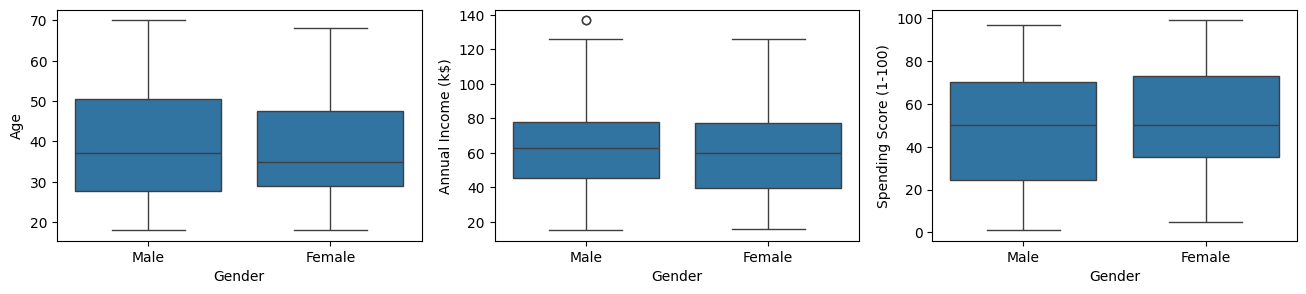

In [320]:
plt.figure(figsize=(16,3))
plt.subplot(1,3,1)
sns.boxplot(data=data,x="Gender",y="Age")
plt.subplot(1,3,2)
sns.boxplot(data=data,x="Gender",y="Annual Income (k$)")
plt.subplot(1,3,3)
sns.boxplot(data=data,x="Gender",y="Spending Score (1-100)")
plt.show()

Import Kmeans from sklearn library

In [321]:
from sklearn.cluster import KMeans

<Figure size 1000x200 with 0 Axes>

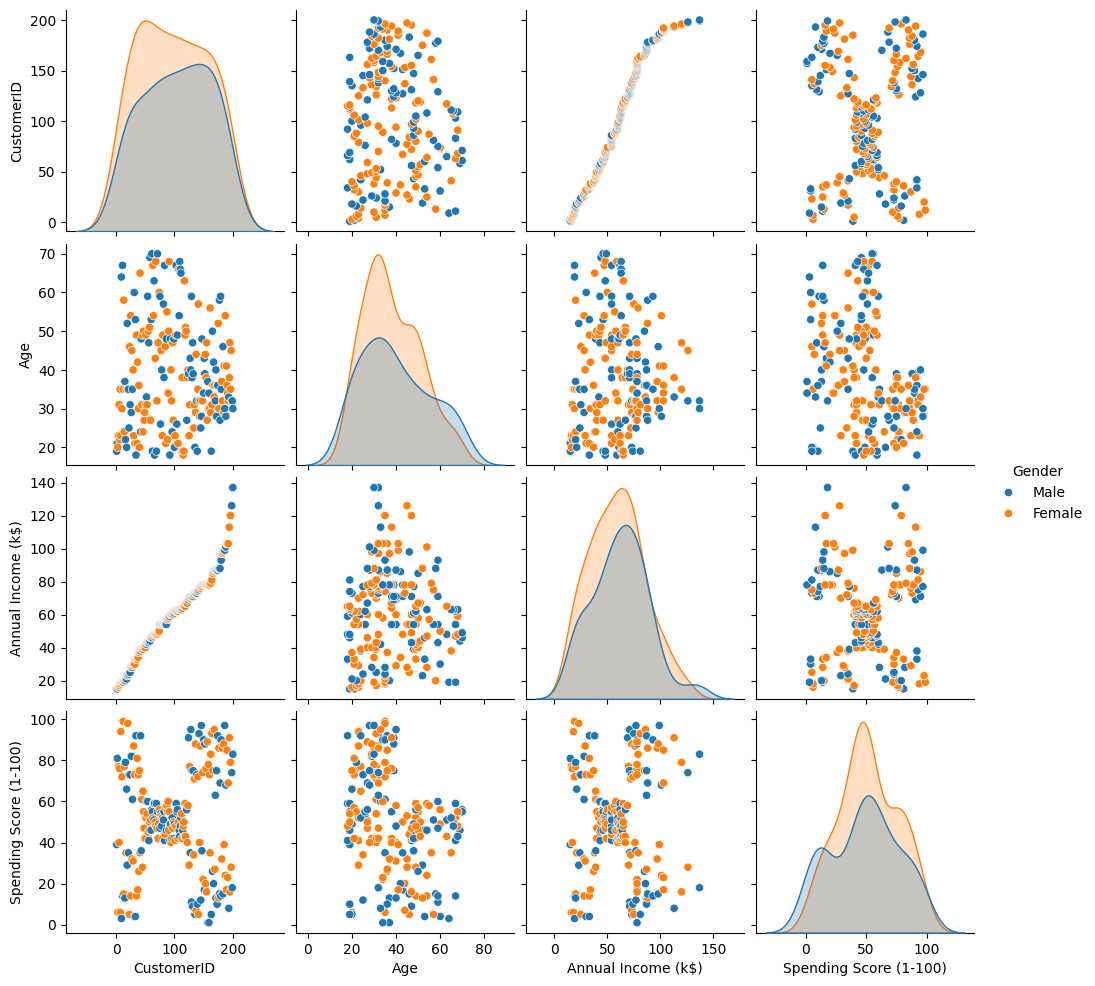

In [322]:
plt.figure(figsize=(10,2))
sns.pairplot(data=data,hue="Gender")
plt.show()

converting categorical data into numeric data

In [323]:
one=OneHotEncoder(drop="first")
data["Gender"]=one.fit_transform(data[["Gender"]]).toarray()

Extracting important features from the data

In [324]:
x=data.iloc[:,-3:]

Using elbow mwthod to find optimal number of cluster

In [325]:
wcss=[]
for i in range(2,21):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

Text(0, 0.5, 'wcss')

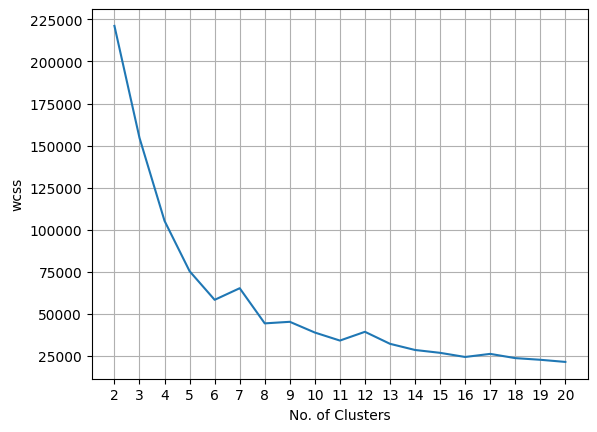

In [326]:
plt.plot([i for i in range(2,21)],wcss)
plt.xticks([i for i in range(2,21)])
plt.grid(visible=True)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")

Using Silhouette score for finding optimal number of cluster

In [327]:
from sklearn.metrics import silhouette_score

In [328]:
ss=[]
for i in range(2,21):
    km=KMeans(n_clusters=i)
    cluster_labels = km.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    ss.append(silhouette_avg)

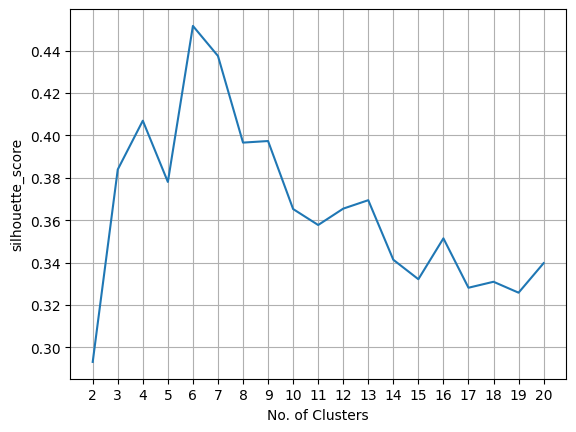

In [329]:
plt.plot(range(2,21),ss)
plt.xticks([i for i in range(2,21)])
plt.grid(visible=True)
plt.xlabel("No. of Clusters")
plt.ylabel("silhouette_score")
plt.show()

From silhouette score it is seen that optimal number of cluster will be 6 as it has maximum silhouette score

In [330]:
km=KMeans(n_clusters=6,random_state=42)
km.fit(x)

KMeans(n_clusters=6, random_state=42)

In [331]:
data["cluster"]=km.labels_

In [332]:
print(data.groupby('cluster').describe())

        CustomerID                                                             \
             count        mean        std    min    25%    50%     75%    max   
cluster                                                                         
0             76.0   86.013158  22.834765   47.0   66.5   86.5  105.25  127.0   
1             10.0  191.000000   6.055301  182.0  186.5  191.0  195.50  200.0   
2             25.0   27.480000  17.717976    2.0   14.0   26.0   38.00   69.0   
3             37.0  162.945946  21.743385  125.0  145.0  163.0  181.00  199.0   
4             29.0  152.000000  17.029386  124.0  138.0  152.0  166.00  180.0   
5             23.0   23.000000  13.564660    1.0   12.0   23.0   34.00   45.0   

        Gender            ... Annual Income (k$)         \
         count      mean  ...                75%    max   
cluster                   ...                             
0         76.0  0.407895  ...              62.00   71.0   
1         10.0  0.400000  ...     

Visualizing clusters using scatter plot

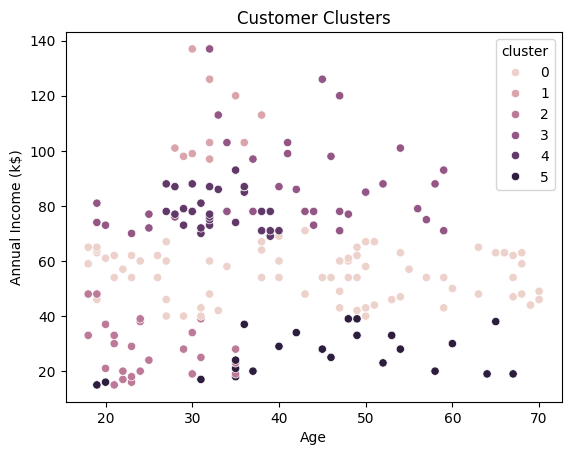

In [333]:
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='cluster', data=data)
plt.title('Customer Clusters')
plt.show()

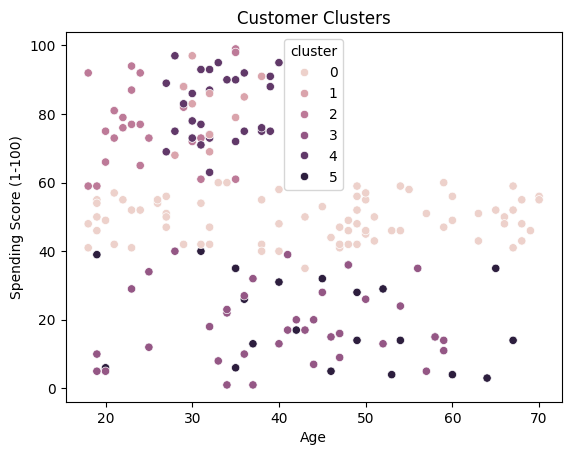

In [334]:
sns.scatterplot(x='Age', y="Spending Score (1-100)", hue='cluster', data=data)
plt.title('Customer Clusters')
plt.show()

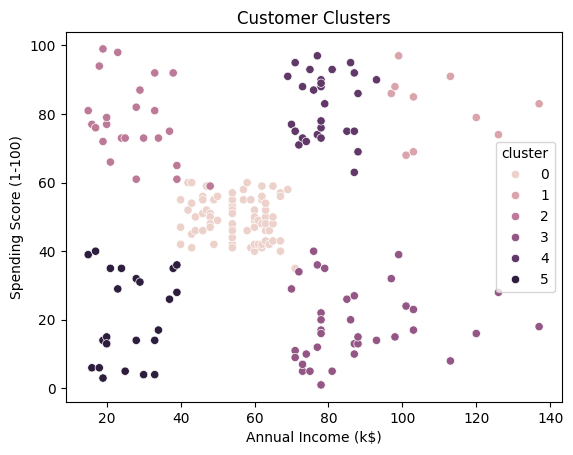

In [335]:
sns.scatterplot(x='Annual Income (k$)', y="Spending Score (1-100)", hue='cluster', data=data)
plt.title('Customer Clusters')
plt.show()

count of customers in each cluster

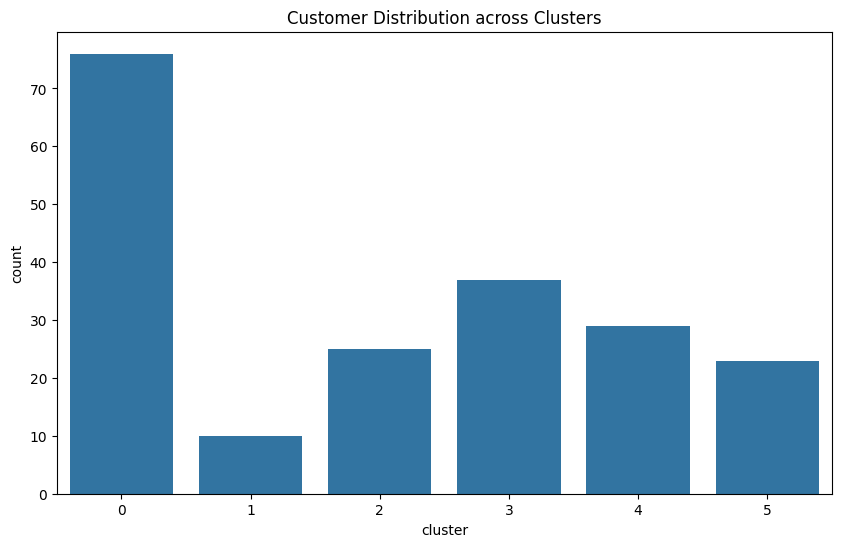

In [337]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=data)
plt.title('Customer Distribution across Clusters')
plt.show()

Observation based on two features that is Annual Income and Spending Score

Cluster 0: Medium spending score and medium annual income

Cluster 1: High spending score and high annual income

Cluster 2: High spending score and low annual income

Cluster 3: Low spending score and high annual income

Cluster 4: High spending score and medium annual income

Cluster 5: Low spending score and Low annual income